<a href="https://colab.research.google.com/github/kamilafariasg/walk-forward-times-series/blob/main/walk_forward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aplicando o Walk Forward na Base de Dados Champagne.**

### **Importando Bibliotecas**

In [102]:
from math import sqrt
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
from numpy import mean
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import plotly


### **Preparando Drive**

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Lendo Base de Dados**

In [8]:
dataset = pd.read_csv("/content/drive/My Drive/dataset/champagne.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


### **Análise de Dados**

É mostrado que existem 105 observações e 2 colunas.

In [9]:
dataset.shape

(105, 2)

Amostra da base de dados.

In [10]:
dataset.head(10)

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946
5,1964-06,3036
6,1964-07,2282
7,1964-08,2212
8,1964-09,2922
9,1964-10,4301


Verificando quantidade de informações nulas

In [11]:
dataset.isnull().sum()

Month    0
Sales    0
dtype: int64

Verifica que não há dados duplicados

In [12]:
len(dataset.duplicated())

105

Visão geral das séries numéricas

In [13]:
dataset.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


Distribuição dos dados

Text(0.5, 1.0, 'Série de vendas de champagne ')

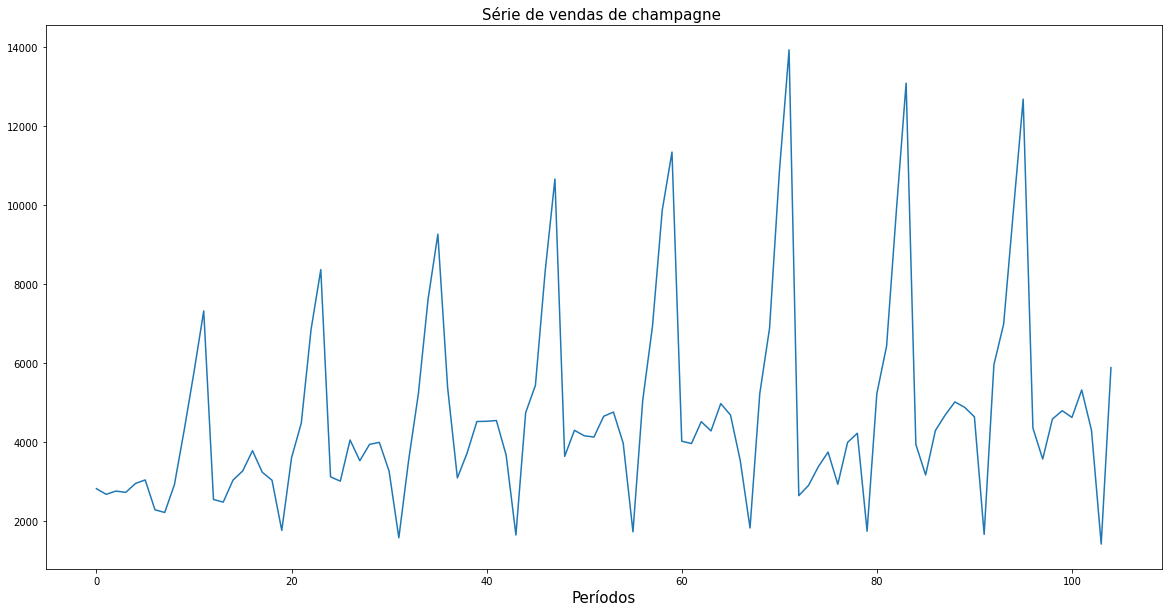

In [96]:
plt.figure(figsize=(20,10))
dataset["Sales"].plot()
plt.xlabel('Períodos',size=15)
plt.title('Série de vendas de champagne ',size=15)


In [97]:
# Define a variável window = 3 que será a janela de 3 valores:
window = 17

# Obtém os 3 primeiros valores da serie:
history = [series.Sales[i] for i in range(window)]

# Obtém todos os valores após os tres primeiros:
test = [series.Sales[i] for i in range(window, len(series.Sales))]

# Cria lista de predições:
predicoes = []

# percorre sobre os dados de teste...

for t in range(len(test)):
  # Define a variável length com o tamanho da variável history:
  length = len(history)
  
  # Define a variável valor_predito com a média dos 3 valores correntes..                                                           
  valor_predito = mean([history[i] for i in range(length - window, length)])        
  
  # Define a variável valor_real com o valor atual do teste..
  valor_real = test[t]                                                              
  
  # Alimenta a lista de predições:
  predicoes.append(valor_predito)                                                  
  
  # Atualiza a lista history com os valores correntes..
  history.append(valor_real)                                                        
  
  # Imprime o valor predito e o real...
  print('Valor predito=%f, Valor real=%f' % (valor_predito, valor_real))  

Valor predito=3342.764706, Valor real=3230.000000
Valor predito=3367.176471, Valor real=3028.000000
Valor predito=3388.117647, Valor real=1759.000000
Valor predito=3329.529412, Valor real=3595.000000
Valor predito=3380.941176, Valor real=4474.000000
Valor predito=3470.823529, Valor real=6838.000000
Valor predito=3694.470588, Valor real=8357.000000
Valor predito=4051.823529, Valor real=3113.000000
Valor predito=4104.823529, Valor real=3006.000000
Valor predito=4109.764706, Valor real=4047.000000
Valor predito=4094.823529, Valor real=3523.000000
Valor predito=3963.000000, Valor real=3937.000000
Valor predito=3764.470588, Valor real=3986.000000
Valor predito=3849.470588, Valor real=3260.000000
Valor predito=3895.647059, Valor real=1573.000000
Valor predito=3809.882353, Valor real=3528.000000
Valor predito=3825.294118, Valor real=5211.000000
Valor predito=3909.705882, Valor real=7614.000000
Valor predito=4167.588235, Valor real=9254.000000
Valor predito=4533.823529, Valor real=5375.000000


In [98]:
# calcula a métrica de rmse
rmse_janeladeslizante = sqrt(mean_squared_error(predicoes, test))

# imprime o valor de rmse
print('Métrica RMSE: %.3f' % rmse_janeladeslizante)


Métrica RMSE: 2695.496
